
#### Teoría de Circuitos II

#  Tarea Semanal 5
#### Autor: Federico Rodriguez Vizzon
<img src="./ned.jpeg" align="left" width="150" /> 


## Transformacion de plantilla pasa alto a pasa bajos

Partimos de la siguiennte plantilla de diseño:

<img src="./Plantilla.png" align="left" width="400" /> 

$Q=5$ 

$f_o = 22KHz$ 

$f_{s1} = 17KHz$

$f_{s2} = 36KHz$

$\mid T(f_{s1})\mid = -16dB$

$\mid T(f_{s2})\mid = -24dB$

$\alpha_{max} = 0.5dB$

### Planteamos las ecucaciones de diseño de un pasa banda:

$\Omega = \frac{1}{B}\frac{\omega^2 - \omega_o^2}{\omega}$

$\omega_o^2 = \omega_1\omega_2$ que lo mismo que $f_o^2 =f_1f_2$ (I)

$B = \omega_2 - \omega_1$

$Q = \frac{\omega_o}{B}$

Operando

$Q = \frac{1}{\frac{\omega_2}{\omega_0} - \frac{\omega_1}{\omega_0}} = \frac{1}{\frac{f_2}{f_0} - \frac{f_1}{f_0}}$

Si $f_o = 1$ nos queda $Q = \frac{1}{f_2 - f_1}$ (II)

Ahora estamos en condiciones de calcular $\Omega_{s1,s2}$

$\Omega = \frac{1}{B}\frac{\omega^2 - \omega_o^2}{\omega}$

$\Omega_{s1} = \frac{1}{B}\frac{\omega_{s1}^2 - 1}{\omega_{s1}}$

$\Omega_{s2} = \frac{1}{B}\frac{\omega_{s2}^2 - 1}{\omega_{s2}}$

In [86]:
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from scipy import signal as signal
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys, tf2sos_analog, pretty_print_SOS
## setear en True para ver logs de dev
dev = False

w_0 = 2*np.pi*22e3
w_s_1 = 2*np.pi*17e3
w_s_2 = 2*np.pi*36e3


w_0_norma = 1
w_s_1_normalizada = w_s_1/w_0
w_s_2_normalizada = w_s_2/w_0

q = 5
b = 1/q

Omega_s1 = q *((w_s_1_normalizada**2 -1)/w_s_1_normalizada)
Omega_s2 = q *(w_s_2_normalizada**2 -1)/w_s_2_normalizada


display(Markdown(f"""$\Omega_{{s1}} = {Omega_s1}$"""))
display(Markdown(f"""$\Omega_{{s2}} = {Omega_s2}$"""))

ee = (10**(0.5/10) -1)
e = np.sqrt(ee)
display(Markdown(f"""$\epsilon^2 = {ee}$"""))
display(Markdown(f"""$\epsilon = {e}$"""))

display(Markdown(f"""Calculo de $\\alpha(\Omega)$ para $\Omega_{{s1}} = {Omega_s1}$  y cuando $\Omega_{{s2}} = {Omega_s2}$"""))
for order in range(1, 5):
    alpha_1 = 10*np.log10(1+ee*(np.cosh(order*np.arccosh((-1)*Omega_s1))**2))
    alpha_2 = 10*np.log10(1+ee*(np.cosh(order*np.arccosh(Omega_s2))**2))
    display(Markdown(f"""$Orden = {order}$"""))
    display(Markdown(f"""$\\alpha(\Omega_{{s1}}) = {alpha_1} \\land \\alpha(\Omega_{{s2}}) = {alpha_2}$
    """))

    
    

$\Omega_{s1} = -2.6069518716577527$

$\Omega_{s2} = 5.126262626262628$

$\epsilon^2 = 0.12201845430196334$

$\epsilon = 0.34931140018894796$

Calculo de $\alpha(\Omega)$ para $\Omega_{s1} = -2.6069518716577527$  y cuando $\Omega_{s2} = 5.126262626262628$

$Orden = 1$

$\alpha(\Omega_{s1}) = 2.6227581358748617 \land \alpha(\Omega_{s2}) = 6.239178280680387$
    

$Orden = 2$

$\alpha(\Omega_{s1}) = 13.08527618875543 \land \alpha(\Omega_{s2}) = 25.123400470188976$
    

$Orden = 3$

$\alpha(\Omega_{s1}) = 26.86670727783945 \land \alpha(\Omega_{s2}) = 45.242131206488956$
    

$Orden = 4$

$\alpha(\Omega_{s1}) = 40.862114569723246 \land \alpha(\Omega_{s2}) = 65.37477409889212$
    

Podemos observar que para $n = 3$ se cumple con la atenucion exigida para $\Omega{s1} \land \Omega_{s2}$ 

Plantilla de diseño filtro pasa bajos.

<img src="./plantilla_lp.jpg" align="left" width="600" /> 

## Calculo transferencia Chebyshev

Recordando $\mid T(\Omega) \mid^2 = \frac{1}{1 + \epsilon^2C_n^2(\Omega)}$

$Cn = 2\Omega C_{n-1} - C_{n-2}$

Para un $n = 3$ debemos obtener $C_3$

$C_0 = 1$

$C_1 = \Omega$

$C_2 = 2\Omega^2 - 1$

$C_3 = 2\Omega C_2 - C_1 = 2\Omega(2\Omega^2 - 1) - \Omega = 4\Omega^3 -3\Omega$

$C_3^2 = 16\Omega^6 -24\Omega^4 + 9\Omega2$


$\mid T(j\Omega) \mid^2 = \frac{1}{1 + \epsilon^2(16\Omega^6 -24\Omega^4 + 9\Omega^2)} = \frac{\frac{1}{\epsilon^2}}{1 + (16\Omega^6 -24\Omega^4 + 9\Omega^2)} =  \frac{\frac{1}{16\epsilon^2}}{\Omega^6 -\frac{3}{2}\Omega^4 + \frac{9}{16}\Omega^2 + \frac{1}{16\epsilon^2} }$

Si $\Omega = \frac{s}{j}$

$\mid T(s) \mid^2 = \frac{\frac{1}{16\epsilon^2}}{-s^6 + \frac{3}{2}s^4 - \frac{9}{16}s^2 + \frac{1}{16\epsilon^2}} = T(s)T(-s)$

In [87]:
den_cheby = np.array([-1, 0, (-3/2), 0, (-9/16), 0, (1/(16*ee))])
roots_cheby = np.roots(den_cheby)
for root in roots_cheby:
    print(root)
den_first_section = np.polymul(-1, roots_cheby[4])
den_first_section = np.array([1, den_first_section[0]])
den_second_section = np.polymul(np.array([-1, roots_cheby[0]]), np.array([-1, roots_cheby[1]]))
num_first_section = np.array([den_first_section[1]])
num_second_section = np.array([den_second_section[2]])
if dev == True:
    print("dev log, num first section", num_first_section)
    print("dev log, denominador first section", den_first_section)
    print("dev log, num second section", num_second_section)
    print("dev log, denominador second section", den_second_section)
    print(num_first_section[0]*num_second_section[0])
    print(1/(4*e))


## nos tomamos la libertad de quedarnos con la parte real, por que previamente verificamos que el resultado no tubiera parte imaginaria.
display(Markdown(f"""### Denominador de la seccion de primer orden: $( s + {den_first_section[1].real})$"""))
display(Markdown(f"""### Denominador de la seccion de segundo orden: $( s^2 + s{den_second_section[1].real} + {den_second_section[2].real})$"""))


(-0.3132282431701374+1.0219274910473601j)
(-0.3132282431701374-1.0219274910473601j)
(0.31322824317013676+1.0219274910473595j)
(0.31322824317013676-1.0219274910473595j)
(-0.6264564863402747+0j)
(0.6264564863402747+0j)


### Denominador de la seccion de primer orden: $( s + 0.6264564863402747)$

### Denominador de la seccion de segundo orden: $( s^2 + s0.6264564863402748 + 1.1424477292778032)$

$T_1(s) = \frac{0.6264564863402747}{s + 0.6264564863402747}$

$T_2(s) = \frac{1.14244773}{s^2 + s0.62645649 + 1.14244773}$

$T(s) = T_1(s)T_2(s)= \frac{0.6264564863402747}{s + 0.6264564863402747} \frac{1.14244773}{s^2 + s0.62645649 + 1.14244773}$

In [88]:

z, p, k = signal.cheb1ap(3, 0.5)
print(
    "\n",
    "Polos de un chebyshev de orden 3:", p,
    "\n Ceros de un chebyshev de orden 3:", z,
    "\n k = ", k
)
display(Markdown(f"""Obtuvimos el polinomio de cheby de orden 3 con la funcion de aproximacion de signal.cheb1ap, los polos obtenidos son consistentes con lo desarrollado manualmente."""))



 Polos de un chebyshev de orden 3: [-0.31322824+1.02192749j -0.62645649-0.j         -0.31322824-1.02192749j] 
 Ceros de un chebyshev de orden 3: [] 
 k =  0.7156937903107972


Obtuvimos el polinomio de cheby de orden 3 con la funcion de aproximacion de signal.cheb1ap, los polos obtenidos son consistentes con lo desarrollado manualmente.

## Transformacion de pasa bajos a pasa banda

$T_{BP}(s) = T_{LP}(s = Q\frac{s^2 +1}{s})$

### Empezamos por la etapa de orden 1:

$T_{LP}(s) = \frac{\omega_{01}}{s+\omega_{01}} \land \omega_{01} = 0.6264564863402747$

$T_{1BP} = T_1(s = Q\frac{s^2 +1}{s}) = \frac{s \frac{\omega_{01}}{Q}}{s^2 + s \frac{\omega_{01}}{Q} +1}$

In [89]:
num_first_section_bp = np.array([0, num_first_section[0]/q, 0]).real
den_first_section_bp = np.array([1, den_first_section[1]/q, 1]).real

if dev == True:
    print("dev log, numerado band pass", num_first_section_bp)
    print("dev log, denominador band pass",den_first_section_bp)
    
display(Markdown(f"""$T_{{BP1}}(s) = \\frac{{s {num_first_section_bp[1]}}}{{s^2 {den_first_section_bp[0]} + s{den_first_section_bp[1]} + {den_first_section_bp[2]}}}$"""))
## calculamos el BP aplicando el nucleo de transformacion con signal.lp2bp()
num_1_np, den_1_np = signal.lp2bp(num_first_section.real, den_first_section.real, bw = b)
display(Markdown(f"""Aplicamos el nuccleo de transformacion LP2HP usando scipy obtenemos la siguiente transferencia."""))
pretty_print_SOS(tf2sos_analog(num_1_np, den_1_np))
display(Markdown(f"""Al comparar las dos funciones transferencias podemos apreciar que son iguales."""))



$T_{BP1}(s) = \frac{s 0.12529129726805496}{s^2 1.0 + s0.12529129726805496 + 1.0}$

Aplicamos el nuccleo de transformacion LP2HP usando scipy obtenemos la siguiente transferencia.

<IPython.core.display.Math object>

Al comparar las dos funciones transferencias podemos apreciar que son iguales.

### Etapa de orden 2

$T_{LP2}(s) = \frac{1.14244773}{s^2 + s0.62645649 + 1.14244773} = \frac{a_1}{s^2 + s a_0 + a_1 } $

$T_{BP2}(s) = T_{LP2}(s = Q\frac{s^2 +1}{s}) = \frac{a_1}{Q^2\frac{s^4+2s+1}{s^2} + Q\frac{s^2 +1}{s} a_0 + a_1} = \frac{s^2a_1}{Q^2(S^4+2s^2+1) + a_0Q(s^3 +s) + s^2a_1} = \frac{s^2a_1}{s^4Q^2 + s^3Qa_0 + s^2(2Q^2 + a_1) + s a_0Q +Q^2} = \frac{s^2\frac{a_1}{Q^2}}{s^4 + s^3\frac{a_0}{Q} + s^2\frac{2Q^2+a_1}{Q^2} + s \frac{a_0}{Q} + 1} = \frac{s^2\frac{a_1}{Q^2}}{s^4 + s^3\frac{a_0}{Q} + s^2 \left(2 +\frac{a_1}{Q^2}\right) + s \frac{a_0}{Q} + 1}$


In [90]:
a_0 = den_second_section[1]
a_1 = den_second_section[2]
den_bp_manual = np.array([1, (a_0/q), (2+(a_1/q**2)), (a_0/q), 1])
roots_bp_manual = np.roots(den_bp_manual)
##nos quedamos solo con la parte real, por el redondeo aparece una parte imaginaria e-16
den_bp_sos_1 = np.polymul(np.array([-1, roots_bp_manual[0]]), np.array([-1, roots_bp_manual[2]])).real
den_bp_sos_2 = np.polymul(np.array([-1, roots_bp_manual[1]]), np.array([-1, roots_bp_manual[3]])).real

if dev == True:
    print("a_0 = ", a_0, "\na_1 = ", a_1)
    print("denonimador band pass obtenido manualmente: \n", den_bp_manual)
    print("roots", roots_bp_manual)
    print("denominador band pass sos 1 = \n", den_bp_sos_1)
    print("denominador band pass sos 2 = \n", den_bp_sos_2)
    den_bp_sos_1[2]*den_bp_sos_2[2]

display(Markdown(f"""$T_{{sos1}}(s) = \\frac{{s k_2}}{{s^2 {den_bp_sos_1[0]} + s{den_bp_sos_1[1]} + {den_bp_sos_1[2]}}}$"""))
display(Markdown(f"""$T_{{sos2}}(s) = \\frac{{s k_3}}{{s^2 {den_bp_sos_2[0]} + s{den_bp_sos_2[1]} + {den_bp_sos_2[2]}}}$"""))



$T_{sos1}(s) = \frac{s k_2}{s^2 1.0 + s0.06901747261911159 + 1.226457825635019}$

$T_{sos2}(s) = \frac{s k_3}{s^2 1.0 + s0.05627382464894311 + 0.815356206384213}$

$ K = k_1k_2$

$\frac{a_1}{Q^2} = K \frac{\omega_{02}}{Q}\frac{\omega_{03}}{Q} \frac{QQ}{\omega_{02}\omega_{03}}$

$a_1 = K \omega_{02}\omega_{03} \frac{Q^2}{\omega_{02}\omega_{03}}$

$\omega_{02}\omega_{03} = 1$

$a_1 = K \frac{Q^2}{\omega_{02}\omega_{03}} \implies K = a_1 \frac{\omega_{02}}{Q}\frac{\omega_{03}}{Q} \implies K = \frac{a_1}{Q^2}$


In [91]:
if dev == True:
    display(Markdown(f"""$\\omega_{{02}}\\omega_{{03}} = {np.sqrt(den_bp_sos_1[2])*np.sqrt(den_bp_sos_2[2])}$"""))
k_total = (a_1/25).real
display(Markdown(f"""$K = {k_total}$"""))


$K = 0.04569790917111213$

De esta forma obtenemos la transferencia pasa banda de la etapa de orden 2: 

In [92]:
display(Markdown(f"""$T_{{BP2}}(s) = {k_total} \\frac{{s}}{{s^2 {den_bp_sos_1[0]} + s{den_bp_sos_1[1]} + {den_bp_sos_1[2]}}}\\frac{{s}}{{s^2 {den_bp_sos_2[0]} + s{den_bp_sos_2[1]} + {den_bp_sos_2[2]}}}$"""))


$T_{BP2}(s) = 0.04569790917111213 \frac{s}{s^2 1.0 + s0.06901747261911159 + 1.226457825635019}\frac{s}{s^2 1.0 + s0.05627382464894311 + 0.815356206384213}$

In [123]:
num_a, den_a = signal.lp2bp(num_second_section.real, den_second_section.real, bw = b)
sos_bp = tf2sos_analog(num_a, den_a)
pretty_print_SOS(sos_bp)
pretty_k = sos_bp[0][1]*sos_bp[1][1]
display(Markdown(f"""$K = {k_total}  \land {sos_bp[0][1]} \\times {sos_bp[1][1]} = {pretty_k}$"""))
display(Markdown("""La funcion transferencia obetenida en forma manual y la obtenida usando signal.lp2bp() son consitentes."""))
display(Markdown("""## Transferencia completa del filtro pasabanda."""))
display(Markdown(f"""$T_{{BP}}(s) = \\frac{{s {num_first_section_bp[1]}}}{{s^2 {den_first_section_bp[0]} + s{den_first_section_bp[1]} + {den_first_section_bp[2]}}} {k_total} \\frac{{s}}{{s^2 {den_bp_sos_1[0]} + s{den_bp_sos_1[1]} + {den_bp_sos_1[2]}}}\\frac{{s}}{{s^2 {den_bp_sos_2[0]} + s{den_bp_sos_2[1]} + {den_bp_sos_2[2]}}}$"""))
display(Markdown("""La expresamos en funcion del $\\omega_{{o1}}$ y $\\omega_{{o2}}$"""))
display(Markdown(f"""$T_{{BP}}(s) = \\frac{{s {num_first_section_bp[1]}}}{{s^2 {den_first_section_bp[0]} + s{den_first_section_bp[1]} + {den_first_section_bp[2]}}} K \\frac{{s{den_bp_sos_1[1]}}}{{s^2 {den_bp_sos_1[0]} + s{den_bp_sos_1[1]} + {den_bp_sos_1[2]}}}\\frac{{s{den_bp_sos_2[1]}}}{{s^2 {den_bp_sos_2[0]} + s{den_bp_sos_2[1]} + {den_bp_sos_2[2]}}}$"""))
gain_bp = k_total/(den_bp_sos_1[1]*den_bp_sos_2[1])
display(Markdown(f"""$K = \\frac{{{k_total}}}{{\\omega_{{o1}}\\omega_{{o2}}}} = {gain_bp}$"""))


<IPython.core.display.Math object>

$K = 0.04569790917111213  \land 0.1669343685590422 \times 0.27374775826913955 = 0.04569790917111213$

La funcion transferencia obetenida en forma manual y la obtenida usando signal.lp2bp() son consitentes.

## Transferencia completa del filtro pasabanda.

$T_{BP}(s) = \frac{s 0.12529129726805496}{s^2 1.0 + s0.12529129726805496 + 1.0} 0.04569790917111213 \frac{s}{s^2 1.0 + s0.06901747261911159 + 1.226457825635019}\frac{s}{s^2 1.0 + s0.05627382464894311 + 0.815356206384213}$

La expresamos en funcion del $\omega_{{o1}}$ y $\omega_{{o2}}$

$T_{BP}(s) = \frac{s 0.12529129726805496}{s^2 1.0 + s0.12529129726805496 + 1.0} K \frac{s0.06901747261911159}{s^2 1.0 + s0.06901747261911159 + 1.226457825635019}\frac{s0.05627382464894311}{s^2 1.0 + s0.05627382464894311 + 0.815356206384213}$

$K = \frac{0.04569790917111213}{\omega_{o1}\omega_{o2}} = 11.766054224701417$

In [103]:
## Para la simulacion con np vamos por el siguiente camino, para evitar tener que multiplicar las transferencias 
## a mano.
num_cheby_complete, den_cheby_complet = signal.zpk2tf(z,p,k)
sos_complete_lp = tf2sos_analog(num_cheby_complete, den_cheby_complet)
if dev: print(sos_complete_lp[0], "\n", sos_complete_lp[1])
display(Markdown("""Observamos que la transferencia completa obtenida manualmente es la misma que obtenemos usando la funcion de aproximacion signal.cheb1app()"""))
pretty_print_SOS(sos_complete_lp)
display(Markdown("""Aplicamos el nucleo de transformacion e imprimimos como secciones de segundo orden"""))
num_complete_bp, den_complete_bp = signal.lp2bp(num_cheby_complete, den_cheby_complet, bw = b)
sos_complete = tf2sos_analog(num_complete_bp, den_complete_bp)
if dev: print(sos_complete)
pretty_print_SOS(sos_complete)
print("\n")
display(Markdown(f"""

Podemos observar una diferencia en los valores de los coeficientes del numerador de cada seccion,
pero si calculamos el producto:

${sos_complete[0][1]} \\times {sos_complete[1][1]} \\times {sos_complete[2][1]} = {(sos_complete[0][1]*sos_complete[1][1]*sos_complete[2][1])}$


y lo comparamos con el producto:

${num_first_section_bp[1]} \\times {k_total} = {(num_first_section_bp[1]*k_total)}$

Llegamos al mismo valor"""))

Observamos que la transferencia completa obtenida manualmente es la misma que obtenemos usando la funcion de aproximacion signal.cheb1app()

<IPython.core.display.Math object>

Aplicamos el nucleo de transformacion e imprimimos como secciones de segundo orden

<IPython.core.display.Math object>



Podemos observar una diferencia en los valores de los coeficientes del numerador de cada seccion,
pero si calculamos el producto:

$0.15119988835161355 \times 0.14112564733939606 \times 0.2683241847851805 = 0.005725550322486379$


y lo comparamos con el producto:

$0.12529129726805496 \times 0.04569790917111213 = 0.005725550322486385$

Llegamos al mismo valor

### Simulacion numerica

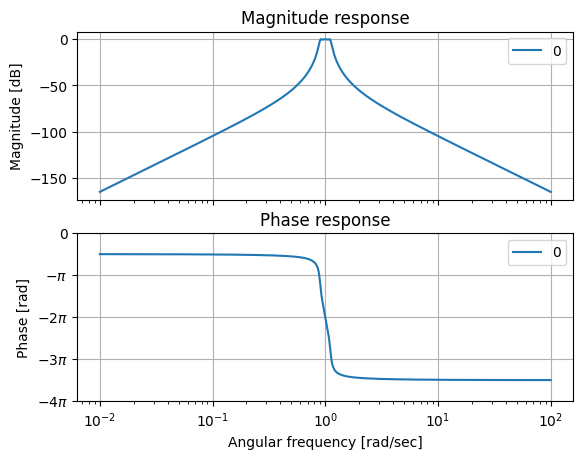

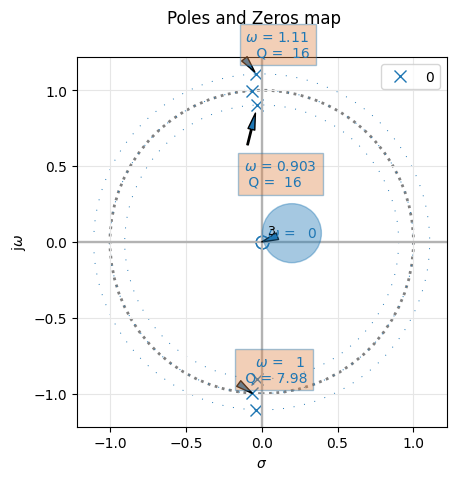

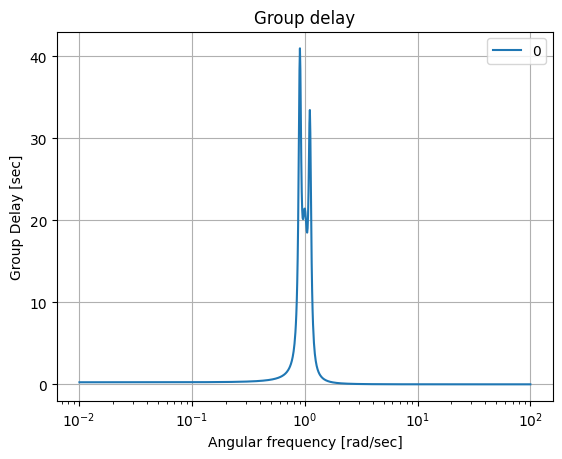

In [104]:
display(Markdown("""### Simulacion numerica"""))
analyze_sys(signal.TransferFunction(num_complete_bp, den_complete_bp))

## Sintesis del filtro pasabandas con celdas pasivas

<img src="./band_pass_pasivo.png" align="left"/> 

Calculamos la funcion transferencia:

$T(s) = \frac{V_o}{V_1} = \frac{s \frac{1}{RC}}{S^2 + s \frac{1}{RC} + \frac{1}{LC}} = \frac{s \frac{\omega_o}{Q}}{s^2 + s \frac{\omega_o}{Q} + \omega_o^2}$

$\frac{\omega_o}{Q} = \frac{1}{RC}$

$\omega_o^2 = \frac{1}{LC}$

In [105]:
### Sintesis de la primera seccion:
display(Markdown("""## Sintesis de la primera seccion"""))
display(Markdown(f"""$T(s) = \\frac{{s{num_first_section_bp[1]}}}{{s^2 {den_first_section_bp[0]} + s{den_first_section_bp[1]} + {den_first_section_bp[2]}}} = 1 $"""))
display(Markdown(f"""$\\omega_o =1 \\implies \\frac{{1}}{{LC}} = 1 $"""))
display(Markdown(f"""Adoptamos $C = 1 \\implies L=1$"""))
display(Markdown(f"""$\\frac{{1}}{{RC}} = \\frac{{1}}{{R}} = \\frac{{\\omega_o}}{{Q}} = {den_first_section_bp[1]}  \\implies R={1/den_first_section_bp[1]}$"""))



## Sintesis de la primera seccion

$T(s) = \frac{s0.12529129726805496}{s^2 1.0 + s0.12529129726805496 + 1.0} = 1 $

$\omega_o =1 \implies \frac{1}{LC} = 1 $

Adoptamos $C = 1 \implies L=1$

$\frac{1}{RC} = \frac{1}{R} = \frac{\omega_o}{Q} = 0.12529129726805496  \implies R=7.9814003191342655$

In [139]:
display(Markdown("""## Sintesis de la segunda seccion"""))
display(Markdown(f"""$T_{{sos1}}(s) = \\frac{{s {den_bp_sos_1[1]}}}{{s^2 {den_bp_sos_1[0]} + s{den_bp_sos_1[1]} + {den_bp_sos_1[2]}}}$"""))
display(Markdown(f"""$\\omega_o^2 = {den_bp_sos_1[2]}\\implies \\frac{{1}}{{LC}} = {den_bp_sos_1[2]} $"""))
display(Markdown(f"""Adoptamos $C = 1 \\implies L=\\frac{{1}}{{\\Omega_o^2}} = {1/den_bp_sos_1[2]}$"""))
display(Markdown(f"""$\\frac{{1}}{{RC}} = \\frac{{1}}{{R}} = \\frac{{\\omega_o}}{{Q}} = {den_bp_sos_1[1]}  \\implies R={1/den_bp_sos_1[1]}$"""))
display(Markdown(f"""$Q = {np.sqrt(den_bp_sos_1[2])/den_bp_sos_1[1]}$"""))
display(Markdown(f"""$\\omega_o = {np.sqrt(den_bp_sos_1[2])}$"""))
display(Markdown(f"""$f_o = {np.sqrt(den_bp_sos_1[2])/(2*np.pi)}$"""))



## Sintesis de la segunda seccion

$T_{sos1}(s) = \frac{s 0.06901747261911159}{s^2 1.0 + s0.06901747261911159 + 1.226457825635019}$

$\omega_o^2 = 1.226457825635019\implies \frac{1}{LC} = 1.226457825635019 $

Adoptamos $C = 1 \implies L=\frac{1}{\Omega_o^2} = 0.8153562063842134$

$\frac{1}{RC} = \frac{1}{R} = \frac{\omega_o}{Q} = 0.06901747261911159  \implies R=14.489084604977124$

$Q = 16.046017359126708$

$\omega_o = 1.1074555637293169$

$f_o = 0.1762570272221423$

In [141]:
display(Markdown("""## Sintesis de la tercera seccion"""))
display(Markdown(f"""$T_{{sos1}}(s) = \\frac{{s {den_bp_sos_2[1]}}}{{s^2 {den_bp_sos_2[0]} + s{den_bp_sos_2[1]} + {den_bp_sos_2[2]}}}$"""))
display(Markdown(f"""$\\omega_o^2 = {den_bp_sos_2[2]}\\implies \\frac{{1}}{{LC}} = {den_bp_sos_2[2]} $"""))
display(Markdown(f"""Adoptamos $C = 1 \\implies L=\\frac{{1}}{{\\Omega_o^2}} = {1/den_bp_sos_2[2]}$"""))
display(Markdown(f"""$\\frac{{1}}{{RC}} = \\frac{{1}}{{R}} = \\frac{{\\omega_o}}{{Q}} = {den_bp_sos_2[1]}  \\implies R={1/den_bp_sos_2[1]}$"""))
display(Markdown(f"""$Q = {np.sqrt(den_bp_sos_2[2])/den_bp_sos_2[1]}$"""))
display(Markdown(f"""$\\omega_o = {np.sqrt(den_bp_sos_2[2])}$"""))
display(Markdown(f"""$f_o = {np.sqrt(den_bp_sos_2[2])/(2*np.pi)}$"""))

## Sintesis de la tercera seccion

$T_{sos1}(s) = \frac{s 0.05627382464894311}{s^2 1.0 + s0.05627382464894311 + 0.815356206384213}$

$\omega_o^2 = 0.815356206384213\implies \frac{1}{LC} = 0.815356206384213 $

Adoptamos $C = 1 \implies L=\frac{1}{\Omega_o^2} = 1.2264578256350194$

$\frac{1}{RC} = \frac{1}{R} = \frac{\omega_o}{Q} = 0.05627382464894311  \implies R=17.770251200062713$

$Q = 16.046017359127283$

$\omega_o = 0.902970767181426$

$f_o = 0.14371226106440493$

In [134]:
#Obtencion de la constante K
display(Markdown("""## Calculo de la constante K o ganancia"""))
display(Markdown(f"""Recordando el valor $K = {gain_bp}$ y usando el siguiente circuito para implementar la etapa de ganancia. """))
display(Markdown(f"""<img src="./gain.png" align="left" width="300"/> """))
display(Markdown("""$\\frac{{V_2}}{{V_1}} = 1 + \\frac{{R_A}}{{R_B}}$"""))
display(Markdown(""" Adoptamos $R_B = 1 \\implies \\frac{{V_2}}{{V_1}} = 1+R_A$"""))
display(Markdown(f"""${gain_bp} = 1 + R_A \\implies {gain_bp} - 1 = {gain_bp -1 } = R_A$"""))



## Calculo de la constante K o ganancia

Recordando el valor $K = 11.766054224701417$ y usando el siguiente circuito para implementar la etapa de ganancia. 

<img src="./gain.png" align="left" width="300"/> 

$\frac{{V_2}}{{V_1}} = 1 + \frac{{R_A}}{{R_B}}$

 Adoptamos $R_B = 1 \implies \frac{{V_2}}{{V_1}} = 1+R_A$

$11.766054224701417 = 1 + R_A \implies 11.766054224701417 - 1 = 10.766054224701417 = R_A$

## Simulacion en spice
<img src="./sim_pasive_sch.png" align="left"/>

### Stop Band
En $f = f_{s1} = \frac{17Khz}{22Kz}\frac{1}{2\pi} = \frac{0.722}{2\pi} = 0.122$  $\alpha(f_{s1}) = 27.45dB$

En $f = f_{s2} = \frac{36Khz}{22Kz}\frac{1}{2\pi} = \frac{1.64}{2\pi} = 0.260$  $\alpha(f_{s1}) = 45.44dB$

Estos valores son consistentes con lo calculado para un Chebyshev de orden 3 (LP) y cumplen con la plantilla de diseño

<img src="./alpha_stop_bands.png" align="left"/>

### Q

Calculamos el valor de Q: 

$Q = \frac{f_o}{f_1 - f_2} = /frac{159.15mHz}{31.5658mHz}= 5.041$

El Q obtenido cumple con lo requerido.

<img src="./Q.png" align="left"/>

### $f_o$

La frecuencia central se encuentra en $f = \frac{1}{2\pi} = 159.15mHz$

Tambien se observan los 3 "toques" correspondientes a un Chebyshev de orden 3.

<img src="./fo.png" align="left"/>